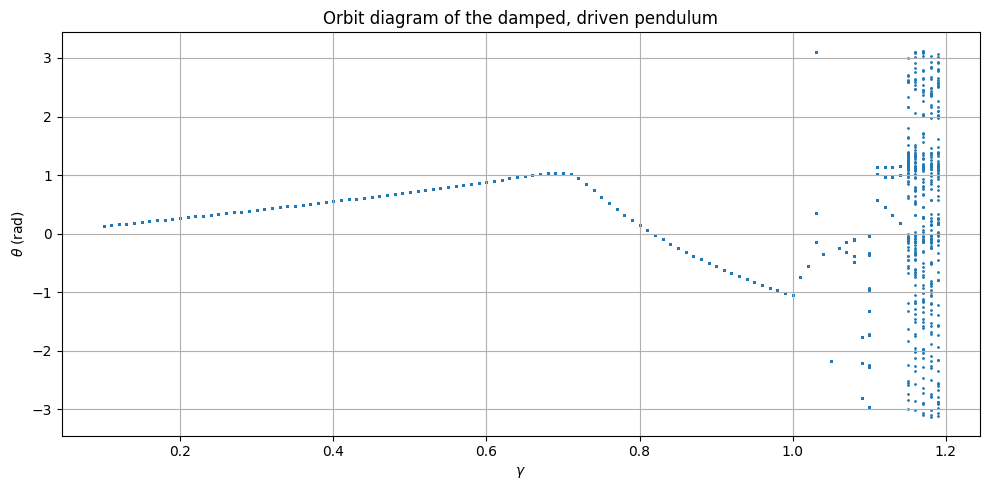

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def pendulum_system(t, v, gamma):
    """Damped, driven pendulum in R³: (θ, θ̇, φ)."""
    w   = 2 * np.pi           # drive frequency
    w0  = 1.5 * w             # natural frequency
    b   = 0.25 * w0           # damping  (β = 0.25 ω₀)

    theta, theta_dot, phi = v
    dtheta_dt      = theta_dot
    dtheta_dot_dt  = gamma * w0**2 * np.cos(phi) - 2 * b * theta_dot - w0**2 * np.sin(theta)
    dphi_dt        = w                                         # φ̇ = ω (uniform)
    return [dtheta_dt, dtheta_dot_dt, dphi_dt]


def orbit_points(gamma, t_final=500, keep_last=100):
    """Integrate once for a given γ and return the last `keep_last` θ values."""
    IC = [np.pi / 2, 0.0, 0.0]                                 # θ₀, θ̇₀, φ₀
    sol = solve_ivp(
        pendulum_system, [0, t_final], IC,
        args=(gamma,),
        method="RK45", rtol=1e-9, atol=1e-12, max_step=0.01,
        dense_output=True
    )

    t_sample      = np.arange(t_final - keep_last, t_final, 1.0)
    theta_samples = sol.sol(t_sample)[0]                       # θ(t)
    theta_wrapped = (theta_samples + np.pi) % (2 * np.pi) - np.pi
    return np.full_like(theta_wrapped, gamma, dtype=float), theta_wrapped


def main():
    gamma_values = np.arange(0.1, 1.20, 0.01)
    all_gamma, all_theta = [], []

    for g in gamma_values:                     # plain serial loop
        g_vec, th_vec = orbit_points(g)
        all_gamma.append(g_vec)
        all_theta.append(th_vec)

    all_gamma = np.concatenate(all_gamma)
    all_theta = np.concatenate(all_theta)

    plt.figure(figsize=(10, 5))
    plt.scatter(all_gamma, all_theta, s=1)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\theta\;(\mathrm{rad})$')
    plt.title('Orbit diagram of the damped, driven pendulum')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
